In [1]:
from src.datasets.dataloader import create_data_loaders
from matplotlib import pyplot as plt
import numpy as np

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [2]:
data_dir = 'data'
val_ratio = 0.005
batch_size = 1
train_loader, val_loader = create_data_loaders(data_dir, val_ratio, batch_size, grayscale=False)

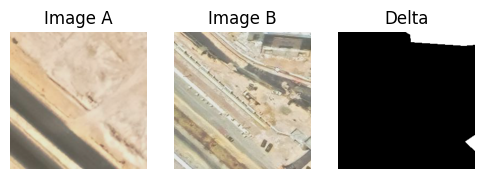

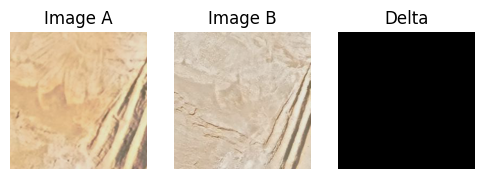

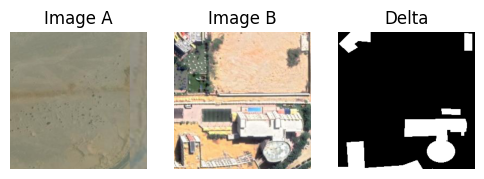

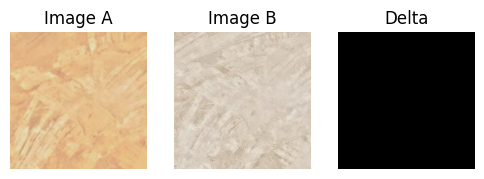

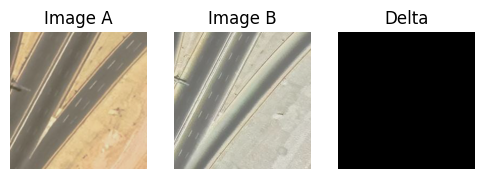

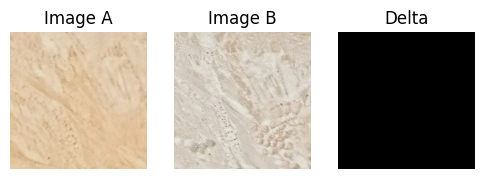

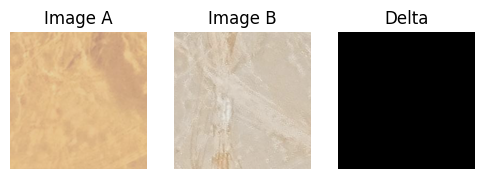

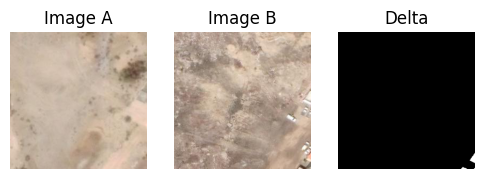

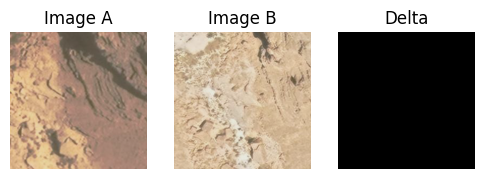

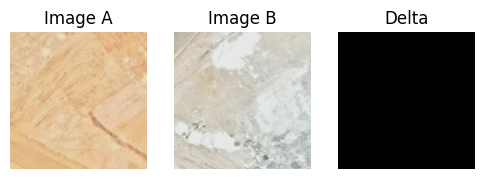

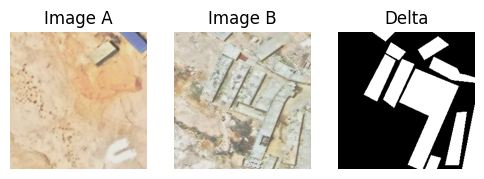

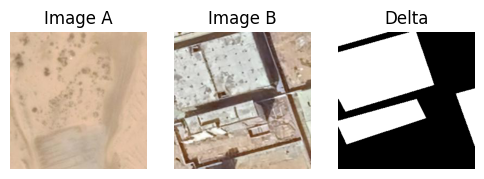

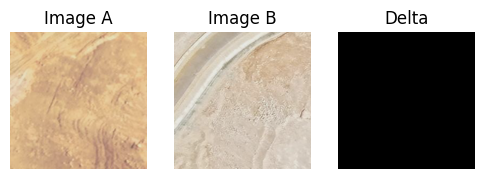

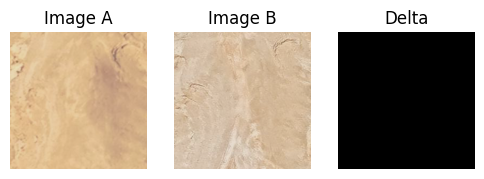

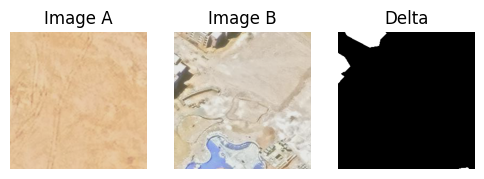

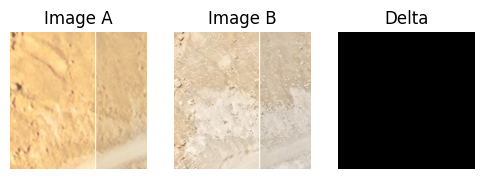

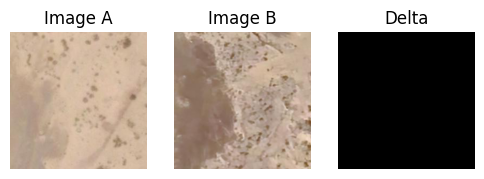

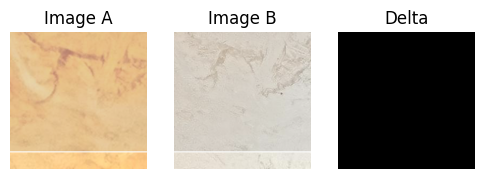

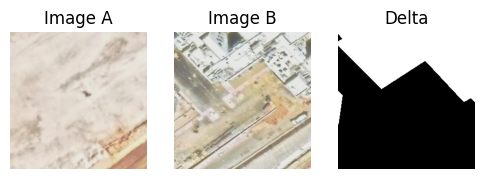

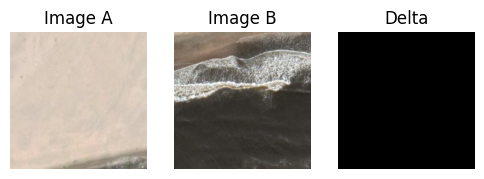

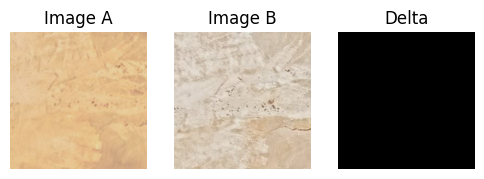

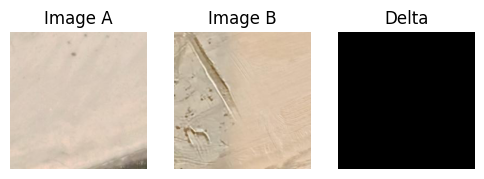

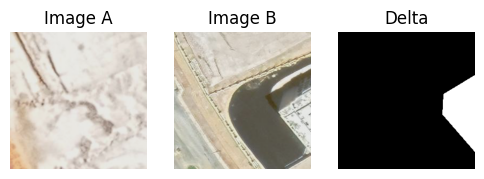

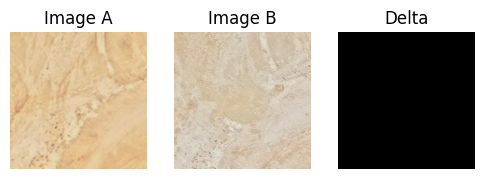

In [19]:
for batch in val_loader:
    A, B, delta = batch
            
    # Convert tensors to numpy arrays
    A = A.squeeze().permute(1, 2, 0).numpy()
    B = B.squeeze().permute(1, 2, 0).numpy()
    # A = A.squeeze().numpy()
    # B = B.squeeze().numpy()
    delta = delta.squeeze().numpy()
    
    # if np.max(delta) == 0:
    #     continue
    
    # Plot the images
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(A, cmap='gray')
    plt.title('Image A')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(B, cmap='gray')
    plt.title('Image B')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(delta, cmap='gray')  # Assuming delta represents the difference between A and B
    plt.title('Delta')
    plt.axis('off')

    plt.show()

In [16]:
from src.models.classical import ImageDiff, CVA
from src.training.evaluation import jaggard_loss

# model = ImageDiff(threshold=0.6)
model = CVA(threshold=0.3)

In [17]:
total_loss = 0.0

for A, B, delta in val_loader:
    output = model.predict(A, B)
    loss = jaggard_loss(delta, output)
    total_loss += loss

avg_loss = total_loss / len(val_loader)
print(f'Evaluation Loss: {avg_loss:.4f}')

Evaluation Loss: 0.9642


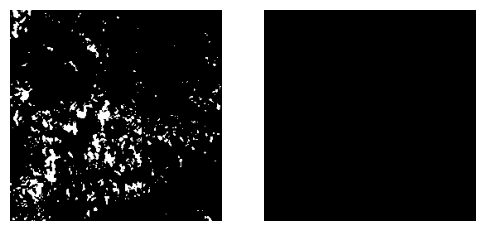

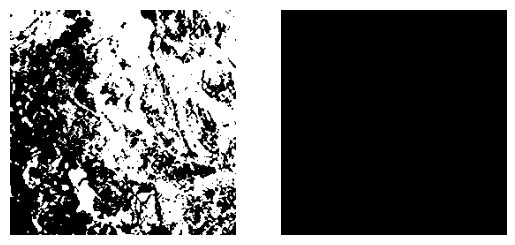

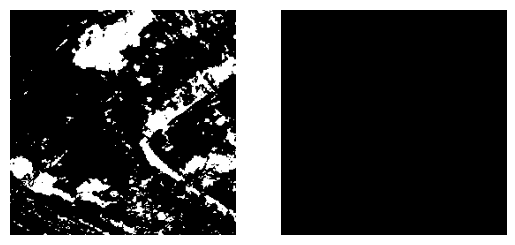

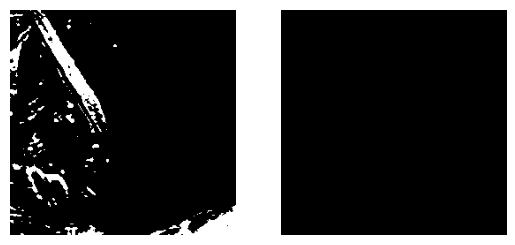

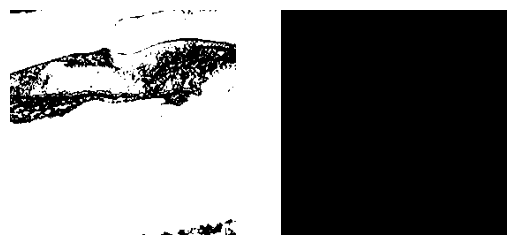

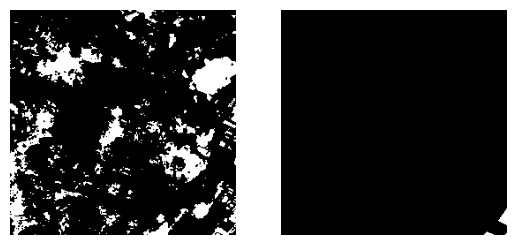

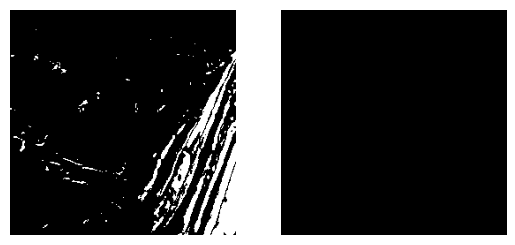

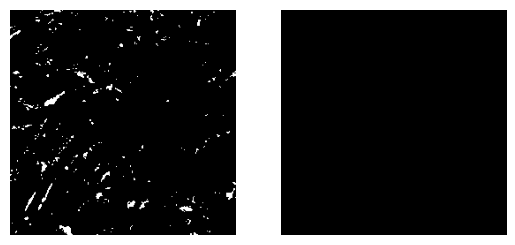

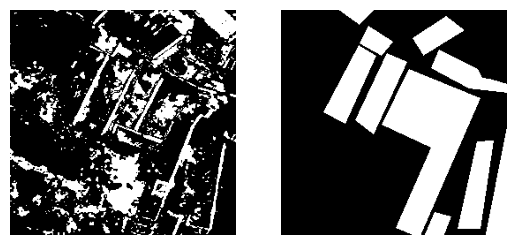

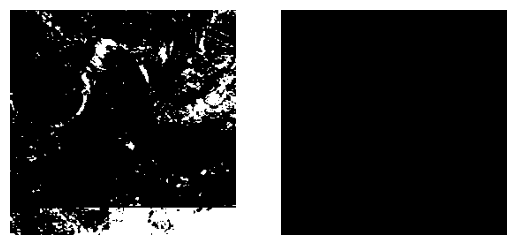

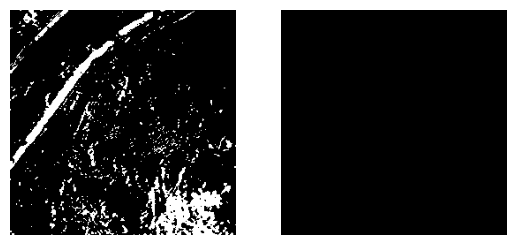

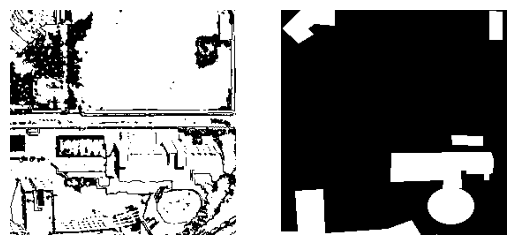

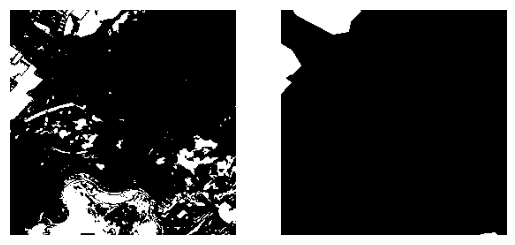

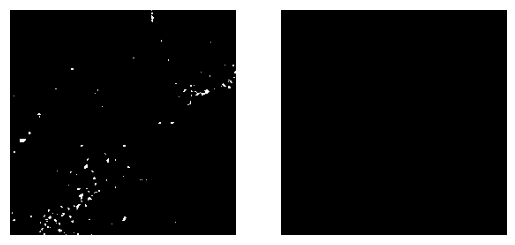

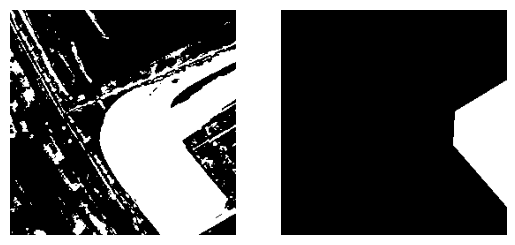

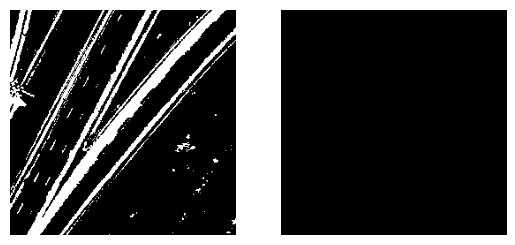

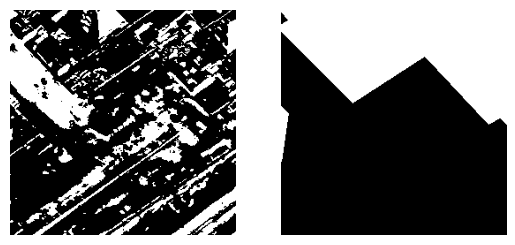

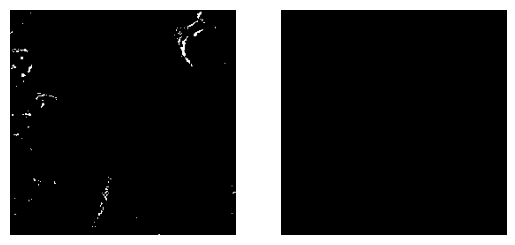

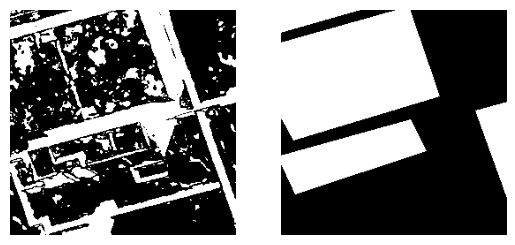

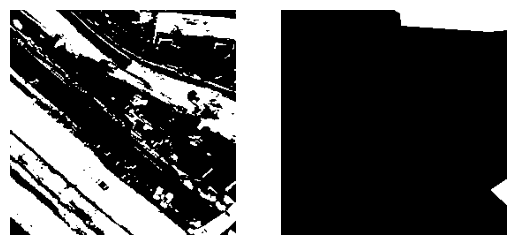

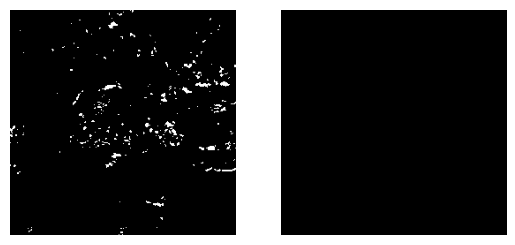

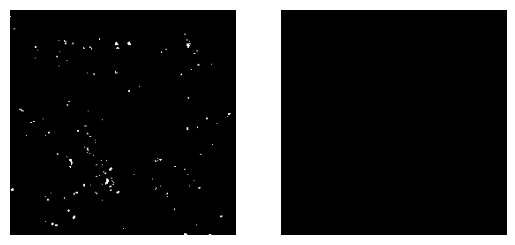

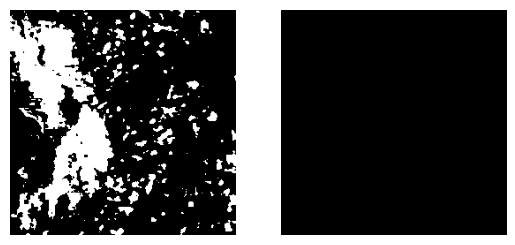

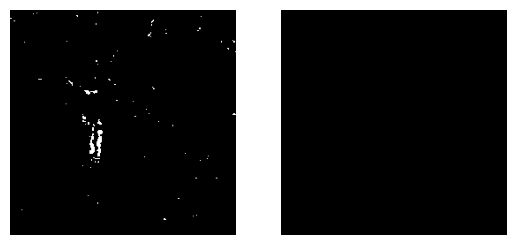

In [18]:
plt.figure(figsize=(6, 3))

for A, B, delta in val_loader:
    output = model.predict(A, B)
    
    plt.subplot(1, 2, 1)
    plt.imshow(output.numpy().squeeze(), cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(delta.numpy().squeeze(), cmap='gray')
    plt.axis('off')
    
    plt.show()